In [ ]:
%pip install tensorflow

# Build, Train, and Evaluate Neural Networks for a Binary Classification Task

In [1]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K

## Phase 1: Data Analysis & Preparation

Data source: Rabie El Kharoua. (2024). 🛍️ Predict Customer Purchase Behavior Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8725150

In [2]:
# load dataset
X = pd.read_csv("data\\customer_purchase_data.csv").iloc[:, :-2]
y = pd.read_csv("data\\customer_purchase_data.csv").iloc[:, [-1]]

In [3]:
X.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram
0,40,1,66120.267939,8,0,30.568601,0
1,20,1,23579.773583,4,2,38.240097,0
2,27,1,127821.306432,11,2,31.633212,1
3,24,1,137798.623120,19,3,46.167059,0
4,31,1,99300.964220,19,1,19.823592,0


In [4]:
y.head()

,PurchaseStatus
0,1
1,0
2,1
3,1
4,1


Min-max normalize the data.

In [5]:
# min-max normalize 
min_vals = X.min(axis=0)
max_vals = X.max(axis=0)
X_norm = (X-min_vals)/(max_vals-min_vals)
X_norm.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram
0,0.423077,1.0,0.355351,0.40,0.00,0.500925,0.0
1,0.038462,1.0,0.027571,0.20,0.50,0.631052,0.0
2,0.173077,1.0,0.830766,0.55,0.50,0.518983,1.0
3,0.115385,1.0,0.907642,0.95,0.75,0.765512,0.0
4,0.250000,1.0,0.611013,0.95,0.25,0.318664,0.0


Visualize the distribution of each feature. The first plot contains the distributions before normalization. The second plot conatins the distributions after normalization.

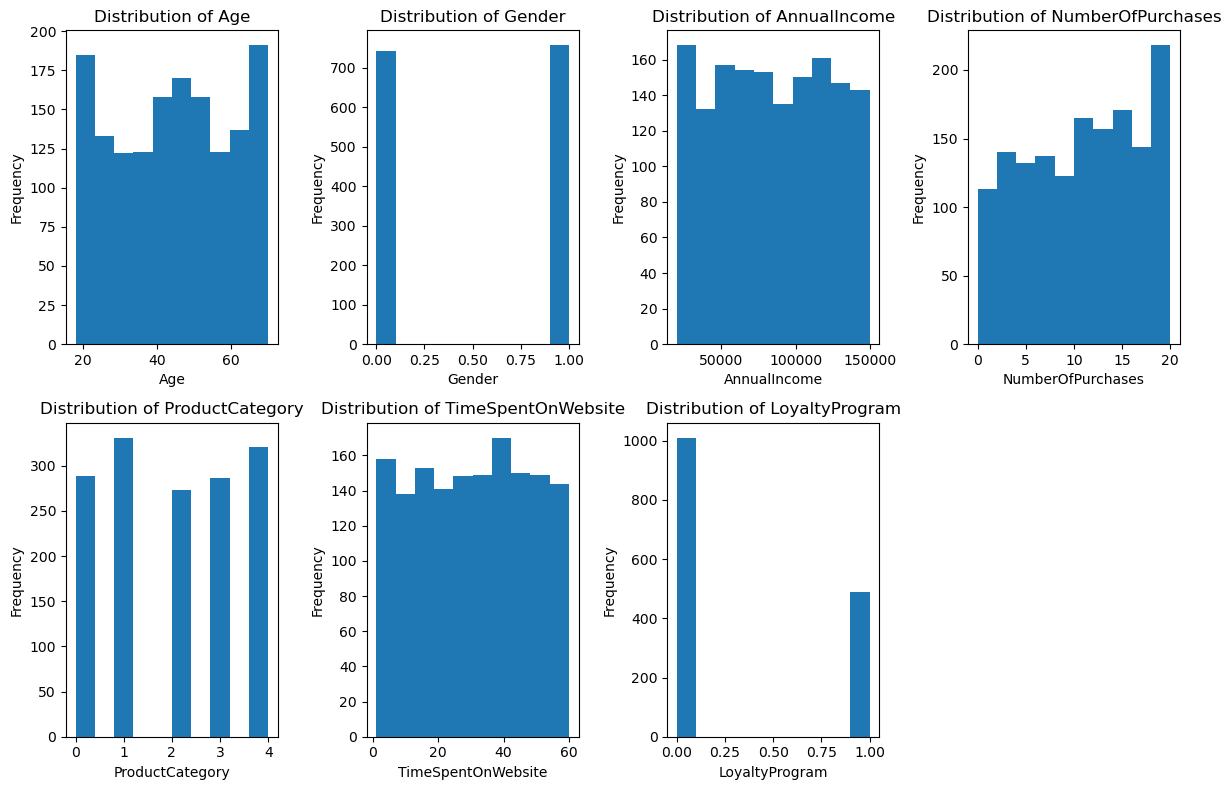

In [6]:
# visualizations before normalization
fig, axs = plt.subplots(2, 4, figsize=(12, 8))
a = axs.ravel()
for idx, ax in enumerate(a):
    if idx == 7:
        fig.delaxes(ax)
        break
    col = X.columns[idx]
    ax.hist(X[col])
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('distribution_of_features.png')
plt.show()

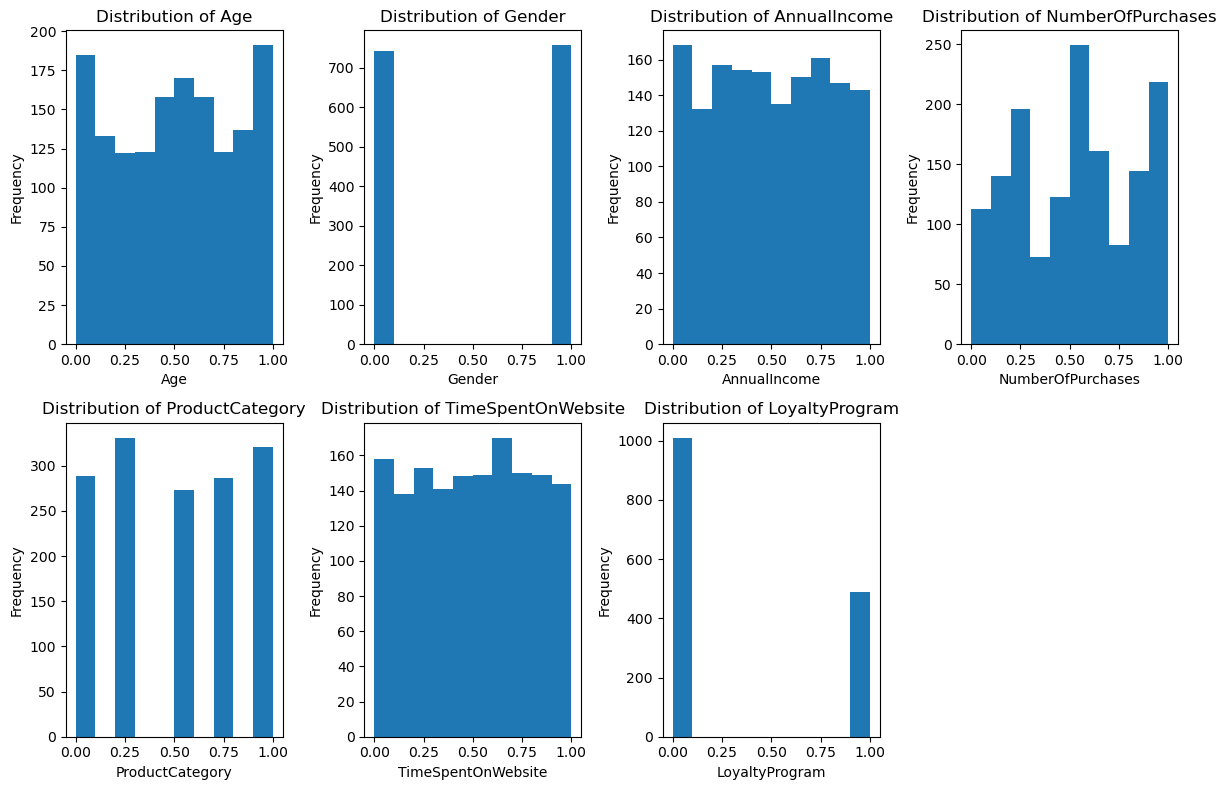

In [7]:
# visualizations after normalization
fig, axs = plt.subplots(2, 4, figsize=(12, 8))
a = axs.ravel()
for idx, ax in enumerate(a):
    if idx == 7:
        fig.delaxes(ax)
        break
    col = X_norm.columns[idx]
    ax.hist(X_norm[col])
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('distribution_of_normalized_features.png')
plt.show()

Describe the range of the values of the features, including mean, median, minimum, and maximum.

In [8]:
# range of values
for col in X.columns:
    print(f'The mean of {col} is {round(X[col].mean(), 2)}.')
    print(f'The median of {col} is {round(X[col].median(), 2)}.')
    print(f'The mininimum value of {col} is {round(X[col].min(), 2)}.')
    print(f'The maximum value of {col} is {round(X[col].max(), 2)}.')
    print('=====================================================')

The mean of Age is 44.3.
The median of Age is 45.0.
The mininimum value of Age is 18.
The maximum value of Age is 70.
The mean of Gender is 0.5.
The median of Gender is 1.0.
The mininimum value of Gender is 0.
The maximum value of Gender is 1.
The mean of AnnualIncome is 84249.16.
The median of AnnualIncome is 83699.58.
The mininimum value of AnnualIncome is 20001.51.
The maximum value of AnnualIncome is 149785.18.
The mean of NumberOfPurchases is 10.42.
The median of NumberOfPurchases is 11.0.
The mininimum value of NumberOfPurchases is 0.
The maximum value of NumberOfPurchases is 20.
The mean of ProductCategory is 2.01.
The median of ProductCategory is 2.0.
The mininimum value of ProductCategory is 0.
The maximum value of ProductCategory is 4.
The mean of TimeSpentOnWebsite is 30.47.
The median of TimeSpentOnWebsite is 30.94.
The mininimum value of TimeSpentOnWebsite is 1.04.
The maximum value of TimeSpentOnWebsite is 59.99.
The mean of LoyaltyProgram is 0.33.
The median of LoyaltyPr

Check the distribution of the target to make sure it's not imbalanced.

In [9]:
# checking distribution of output
perc_zero = round((len(y[y['PurchaseStatus']==0]) / len(y))*100, 2)
print(f'The percentage of purchase is {perc_zero}%')
print(f'The percentage of no purchase is {100 - perc_zero}%')

The percentage of purchase is 56.8%
The percentage of no purchase is 43.2%


## Phase 2: Build a model to overfit the entire dataset

In [12]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
keras.utils.set_random_seed(123)

In [47]:
# training logistic regression model
model = Sequential()
model.add(Dense(1, input_dim=len(X_norm.columns), activation='sigmoid'))

C:\Users\megan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [49]:
model.fit(x=X_norm, y=y, epochs=1024, verbose=1)

Epoch 1/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5362 - loss: 0.6922
Epoch 2/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5693 - loss: 0.6801
Epoch 3/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6056 - loss: 0.6723
Epoch 4/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6150 - loss: 0.6665
Epoch 5/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6138 - loss: 0.6618
Epoch 6/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6167 - loss: 0.6576
Epoch 7/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6233 - loss: 0.6537
Epoch 8/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6256 - loss: 0.6501
Epoch 9/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6308 - loss: 0.6465
Epoch 10/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6394 - loss: 0.6431
Epoch 11/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.6398
Epoch 12/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Accuracy isn't increasing as epochs increase, so I will add layers.

In [54]:
# adding layers
model = Sequential()
model.add(keras.Input(shape=(len(X_norm.columns), )))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 1024)           │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288,153 (1.10 MB)

 Trainable params: 288,153 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [57]:
model.fit(x=X_norm, y=y, epochs=1024, verbose=1)

Epoch 1/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6167 - loss: 0.6738
Epoch 2/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7319 - loss: 0.6192
Epoch 3/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7259 - loss: 0.5728
Epoch 4/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7533 - loss: 0.5333
Epoch 5/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7606 - loss: 0.5162
Epoch 6/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7686 - loss: 0.5094
Epoch 7/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7752 - loss: 0.5036
Epoch 8/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7771 - loss: 0.4991
Epoch 9/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7761 - loss: 0.4975
Epoch 10/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7822 - loss: 0.4942
Epoch 11/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7871 - loss: 0.4913
Epoch 12/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

## Phase 3: Model selection & evaluation

Doing an 80/20 train test split. Set seed so values are consistent.

In [6]:
# shuffle index order to randomize
random.seed(123)
shuffled_idx = np.arange(len(X))
random.shuffle(shuffled_idx)
print(shuffled_idx)

[  9 817 613 ... 178 548 107]


In [7]:
# get top 80% of shuffled indices for train, rest for test
num_train = int(0.8*len(X))
train_idx = shuffled_idx[:num_train]
test_idx = shuffled_idx[num_train:]

In [8]:
# make train and test datasets
X_train = X.iloc[train_idx, :]
Y_train = y.iloc[train_idx, :]
X_test = X.iloc[test_idx, :]
Y_test = y.iloc[test_idx, :]

In [9]:
# normalizing
min_vals = X_train.min(axis=0)
max_vals = X_train.max(axis=0)
X_train_norm = (X_train-min_vals)/(max_vals-min_vals)
X_test_norm = (X_test-min_vals)/(max_vals-min_vals)

Create columns for table.

In [440]:
models = []
num_epochs = []
train_accs = []
train_losses = []
test_accs = []
test_losses = []
precisions = []
recalls = []
f1_scores = []
total_parameters = []

Create random baseline classifier

In [441]:
# random baseline classifier
def random_classifier(X_train, X_test, Y_train, Y_test):
    model = "random baseline classifier"
    train_pred = np.array([])
    test_pred = np.array([])
    for row in Y_train['PurchaseStatus']:
        pred1 = random.randint(0, 1)
        train_pred = np.append(train_pred, pred1)
        
    for row in Y_test['PurchaseStatus']:
        pred2 = random.randint(0, 1)
        test_pred = np.append(test_pred, pred2)
        
    num_epochs, total_parameters = ("--", "--")
    train_acc = round(((((len(Y_train['PurchaseStatus']) - sum(Y_train['PurchaseStatus'])) / len(Y_train['PurchaseStatus'])) *  ((len(train_pred) - sum(train_pred)) / len(train_pred)))
                + ((sum(Y_train['PurchaseStatus']) / len(Y_train['PurchaseStatus'])) * (sum(train_pred) / len(train_pred)))), 2)
    test_acc = round(((((len(Y_test['PurchaseStatus']) - sum(Y_test['PurchaseStatus'])) / len(Y_test['PurchaseStatus'])) *  ((len(test_pred) - sum(test_pred)) / len(test_pred)))
                + ((sum(Y_test['PurchaseStatus']) / len(Y_test['PurchaseStatus'])) * (sum(test_pred) / len(test_pred)))), 2)
    
    train_loss = -np.mean(Y_train['PurchaseStatus'] * np.log(np.clip(train_pred, 1e-15, 1 - 1e-15)) + (1 - Y_train['PurchaseStatus']) * np.log(1 - np.clip(train_pred, 1e-15, 1 - 1e-15)))
    test_loss = -np.mean(Y_test['PurchaseStatus'] * np.log(np.clip(test_pred, 1e-15, 1 - 1e-15)) + (1 - Y_test['PurchaseStatus']) * np.log(1 - np.clip(test_pred, 1e-15, 1 - 1e-15)))
                         
    tp = np.sum(np.logical_and(test_pred == 1, Y_test['PurchaseStatus'] == 1))
    fp = np.sum(np.logical_and(test_pred == 1, Y_test['PurchaseStatus'] == 0))
    fn = np.sum(np.logical_and(test_pred == 0, Y_test['PurchaseStatus'] == 1))

    precision = round(tp / (tp + fp), 2)
    recall = round(tp / (tp + fn), 2)
    f1_score = round(2 * ((precision * recall) / (precision + recall)), 2)
    return model, num_epochs, train_acc, train_loss, test_acc, test_loss, precision, recall, f1_score, total_parameters

In [442]:
metrics = random_classifier(X_train_norm, X_test_norm, Y_train, Y_test)
mylists = [models, num_epochs, train_accs, train_losses, test_accs, test_losses, precisions, recalls, f1_scores, total_parameters]
for m, lst in zip(metrics, mylists):
    lst.append(m)

Create functions to make neural networks.

In [443]:
def create_model(neurons, layers, X_train, Y_train, X_test, Y_test):
    model = Sequential()
    if layers == 1:
        model.add(Dense(1, input_dim=len(X_train.columns), activation='sigmoid'))
        checkpoint_filepath = r"logreg_chkpts\model_epoch_{epoch:02d}-{val_accuracy:.2f}.keras"
    else:
        checkpoint_filepath = r"nn_ckpts\\model"
        model.add(keras.Input(shape=(len(X_train.columns), )))
        for i in range(layers):
            if neurons[i] == 1:
                model.add(Dense(1, activation='sigmoid'))
                checkpoint_filepath += "_1"
            else:
                model.add(Dense(neurons[i], activation='relu'))
                checkpoint_filepath += f"_{neurons[i]}"
    
        checkpoint_filepath += "\\epoch_{epoch:02d}-{val_accuracy:.2f}.keras"
        
    callback_a = keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    history = model.fit(x=X_train, y=Y_train, validation_data=(X_test, Y_test), epochs=512, verbose=0, callbacks=[callback_a])
    return history

In [444]:
def learning_curve(history, best_epoch, model_name, mylists):
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    metrics = (f"{model_name}", 512, train_acc[best_epoch], train_loss[best_epoch], val_acc[best_epoch], val_loss[best_epoch])
    for m, lst in zip(metrics, mylists):
        lst.append(m)
    
    plt.figure()
    plt.plot(np.arange(1, 513), train_acc, label='Train Accuracy')
    plt.plot(np.arange(1, 513), val_acc, label='Test Accuracy')
    plt.plot(best_epoch, val_acc[best_epoch-1],'ro', label='Saved model') 
    plt.xlabel('Epoch Number')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {model_name} with 512 Epochs')
    plt.legend()
    plt.savefig(f'learning_curves\\{model_name}_learning_curve.png')
    plt.show()

In [445]:
def create_metrics(file_path, X_test, mylists):
    model = keras.models.load_model(file_path)

    trainable_count = sum(K.count_params(w) for w in model.trainable_weights)
    non_trainable_count = sum(K.count_params(w) for w in model.non_trainable_weights)
    total_counts = trainable_count + non_trainable_count

    test_pred = model.predict(X_test).flatten()
    test_pred[test_pred >= 0.5] = 1
    test_pred[test_pred < 0.5] = 0

    tp = np.sum(np.logical_and(test_pred == 1, Y_test['PurchaseStatus'] == 1))
    fp = np.sum(np.logical_and(test_pred == 1, Y_test['PurchaseStatus'] == 0))
    fn = np.sum(np.logical_and(test_pred == 0, Y_test['PurchaseStatus'] == 1))
    
    precision = round(tp / (tp + fp), 2)
    recall = round(tp / (tp + fn), 2)
    f1_score = round(2 * ((precision * recall) / (precision + recall)), 2)

    metrics = (precision, recall, f1_score, total_counts)
    for m, lst in zip(metrics, mylists):
        lst.append(m)

Create logistic regression model

In [446]:
# logistic regression model
history_logreg = create_model([1], 1, X_train_norm, Y_train, X_test_norm, Y_test)

C:\Users\megan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


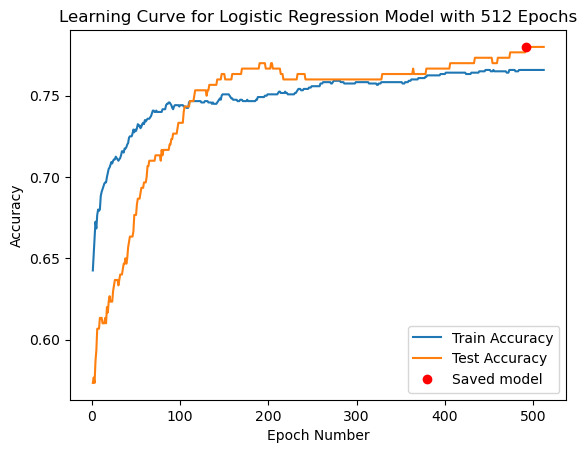

In [447]:
learning_curve(history_logreg, 492, "Logistic Regression Model", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [448]:
create_metrics(r"logreg_chkpts\model_epoch_492-0.78.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Creating neural network model with 2 layers with neurons 4 and 1 respectively.

In [450]:
history_4_1 = create_model([4, 1], 2, X_train_norm, Y_train, X_test_norm, Y_test)

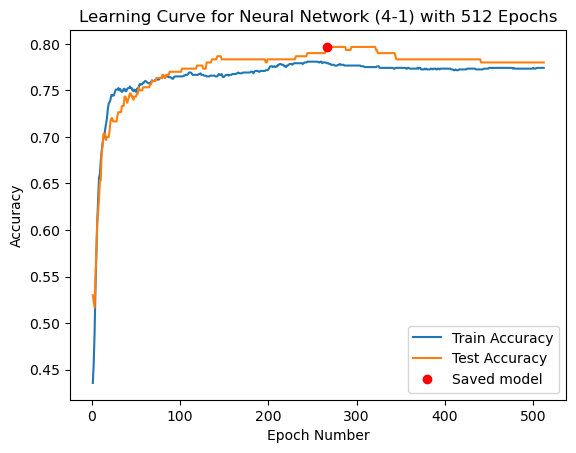

In [451]:
learning_curve(history_4_1, 266, "Neural Network (4-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [452]:
create_metrics(r"nn_ckpts\model_4_1\epoch_266-0.80.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Creating neural network model with 2 layers with neurons 16 and 1 respectively.

In [453]:
history_16_1 = create_model([16, 1], 2, X_train_norm, Y_train, X_test_norm, Y_test)

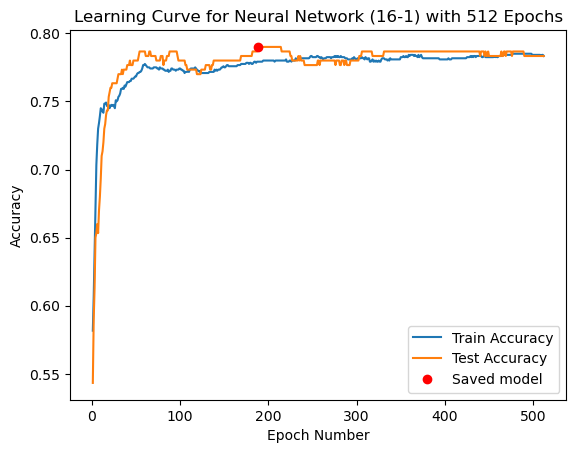

In [454]:
learning_curve(history_16_1, 188, "Neural Network (16-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [455]:
create_metrics(r"nn_ckpts\model_16_1\epoch_188-0.79.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


Creating neural network model with 2 layers with neurons 64 and 1 respectively.

In [456]:
history_64_1 = create_model([64, 1], 2, X_train_norm, Y_train, X_test_norm, Y_test)

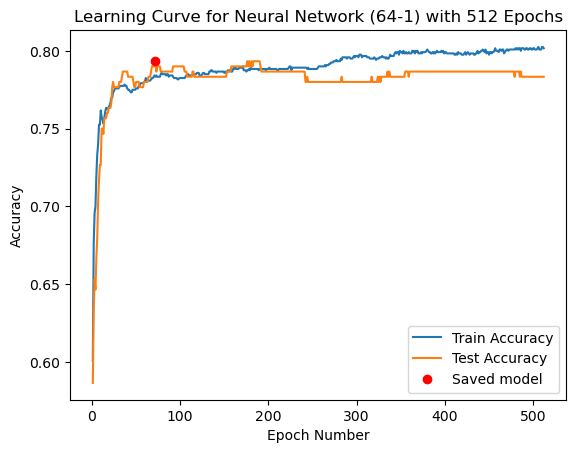

In [457]:
learning_curve(history_64_1, 72, "Neural Network (64-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [458]:
create_metrics(r"nn_ckpts\model_64_1\epoch_72-0.79.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Creating neural network model with 2 layers with neurons 256 and 1 respectively.

In [459]:
history_256_1 = create_model([256, 1], 2, X_train_norm, Y_train, X_test_norm, Y_test)

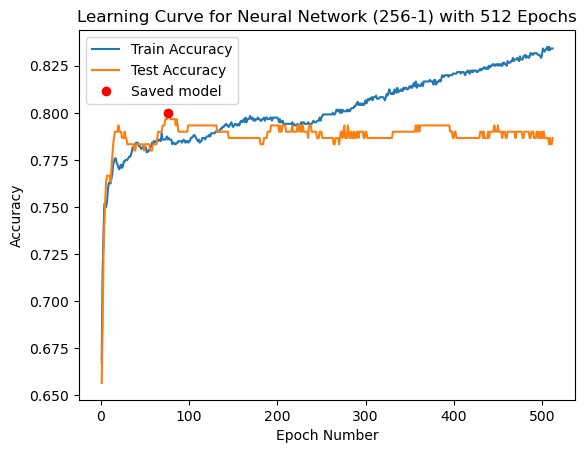

In [460]:
learning_curve(history_256_1, 76, "Neural Network (256-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [461]:
create_metrics(r"nn_ckpts\model_256_1\epoch_76-0.80.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Creating neural network model with 2 layers with neurons 1024 and 1 respectively.

In [463]:
history_1024_1 = create_model([1024, 1], 2, X_train_norm, Y_train, X_test_norm, Y_test)

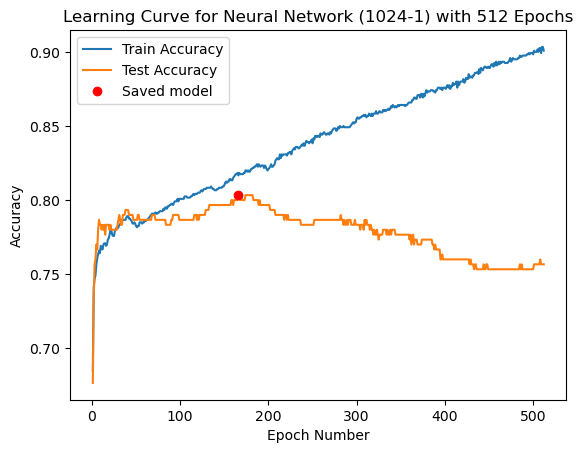

In [464]:
learning_curve(history_1024_1, 166, "Neural Network (1024-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [465]:
create_metrics(r"nn_ckpts\model_1024_1\epoch_166-0.80.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Creating neural network model with 3 layers with neurons 16, 4, and 1 respectively.

In [466]:
history_16_4_1 = create_model([16, 4, 1], 3, X_train_norm, Y_train, X_test_norm, Y_test)

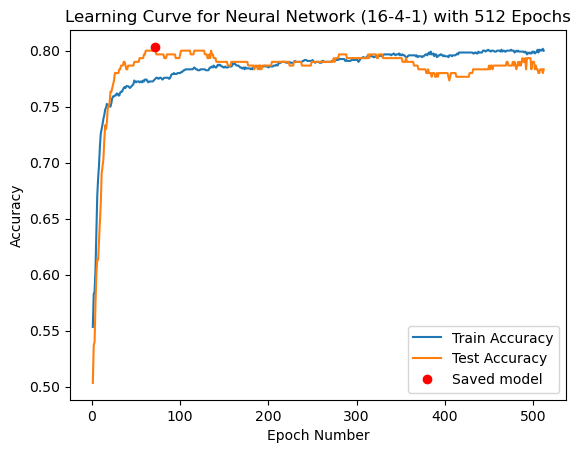

In [467]:
learning_curve(history_16_4_1, 71, "Neural Network (16-4-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [468]:
create_metrics(r"nn_ckpts\model_16_4_1\epoch_71-0.80.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


Creating neural network model with 3 layers with neurons 64, 8, and 1 respectively.

In [469]:
history_64_8_1 = create_model([64, 8, 1], 3, X_train_norm, Y_train, X_test_norm, Y_test)

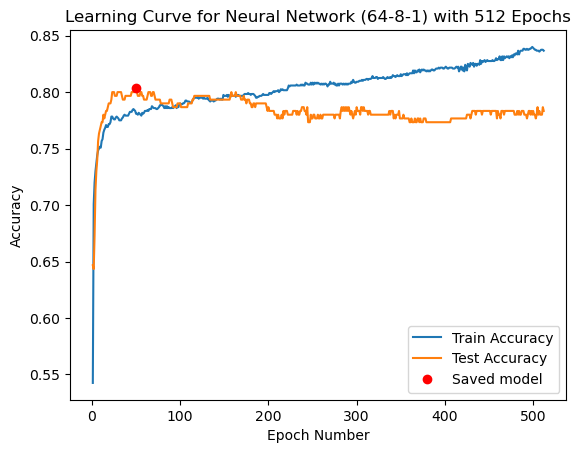

In [470]:
learning_curve(history_64_8_1, 50, "Neural Network (64-8-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [471]:
create_metrics(r"nn_ckpts\model_64_8_1\epoch_50-0.80.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


Creating neural network model with 3 layers with neurons 256, 16, and 1 respectively.

In [472]:
history_256_16_1 = create_model([256, 16, 1], 3, X_train_norm, Y_train, X_test_norm, Y_test)

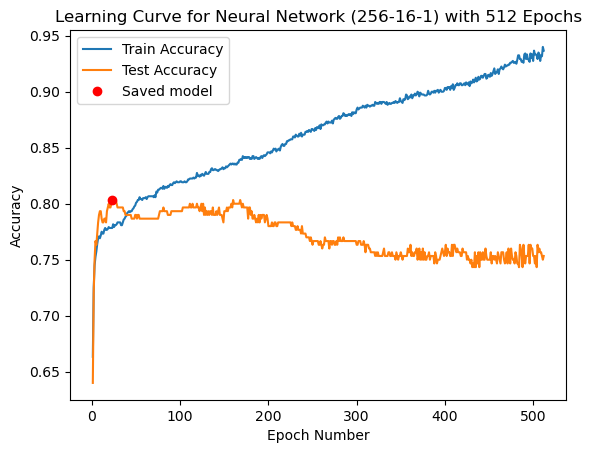

In [473]:
learning_curve(history_256_16_1, 23, "Neural Network (256-16-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [474]:
create_metrics(r"nn_ckpts\model_256_16_1\epoch_23-0.80.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Creating neural network model with 3 layers with neurons 1024, 32, and 1 respectively.

In [475]:
history_1024_32_1 = create_model([1024, 32, 1], 3, X_train_norm, Y_train, X_test_norm, Y_test)

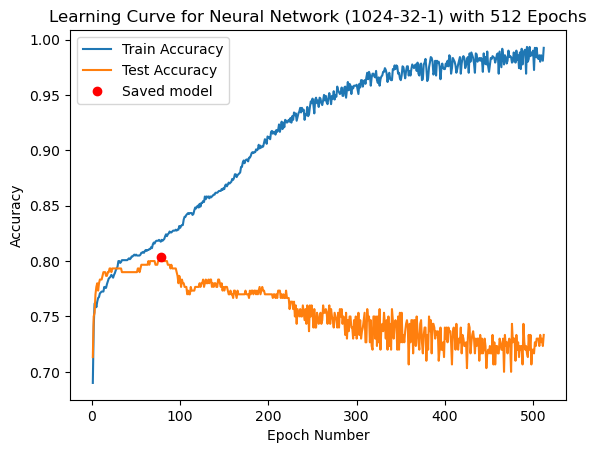

In [476]:
learning_curve(history_1024_32_1, 78, "Neural Network (1024-32-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [477]:
create_metrics(r"nn_ckpts\model_1024_32_1\epoch_78-0.80.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Creating neural network model with 4 layers with neurons 64, 16, 4, and 1 respectively.

In [478]:
history_64_16_4_1 = create_model([64, 16, 4, 1], 4, X_train_norm, Y_train, X_test_norm, Y_test)

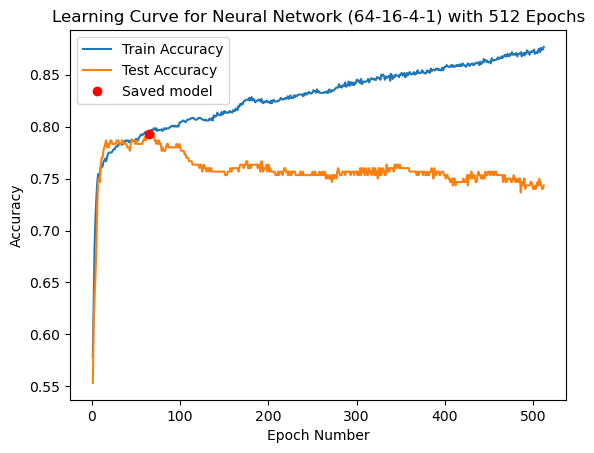

In [479]:
learning_curve(history_64_16_4_1, 65, "Neural Network (64-16-4-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [480]:
create_metrics(r"nn_ckpts\model_64_16_4_1\epoch_65-0.79.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


Creating neural network model with 4 layers with neurons 512, 64, 8, and 1 respectively.

In [481]:
history_512_64_8_1 = create_model([512, 64, 8, 1], 4, X_train_norm, Y_train, X_test_norm, Y_test)

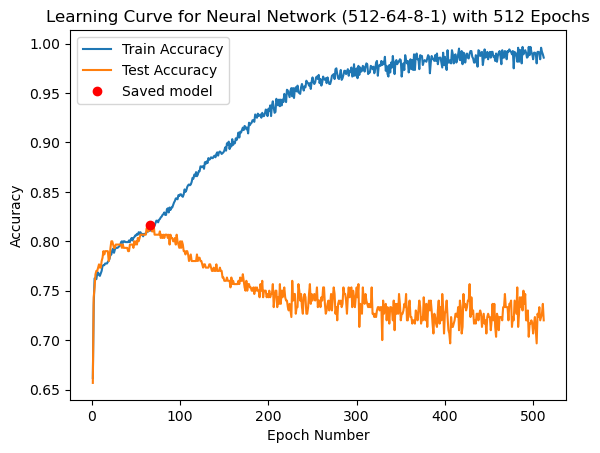

In [482]:
learning_curve(history_512_64_8_1, 66, "Neural Network (512-64-8-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [483]:
create_metrics(r"nn_ckpts\model_512_64_8_1\epoch_66-0.82.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


Creating neural network model with 4 layers with neurons 1024, 256, 16, and 1 respectively.

In [485]:
history_1024_256_16_1 = create_model([1024, 256, 16, 1], 4, X_train_norm, Y_train, X_test_norm, Y_test)

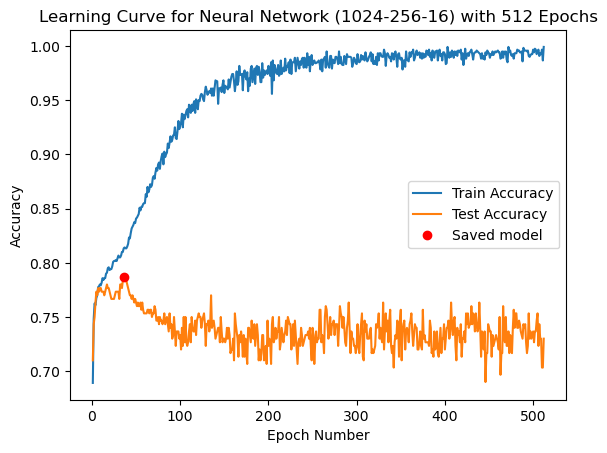

In [486]:
learning_curve(history_1024_256_16_1, 36, "Neural Network (1024-256-16)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [487]:
create_metrics(r"nn_ckpts\model_1024_256_16_1\epoch_36-0.79.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


Creating neural network model with 5 layers with neurons 256, 64, 16, 4, 1

In [488]:
history_256_64_16_4_1 = create_model([256, 64, 16, 4, 1], 5, X_train_norm, Y_train, X_test_norm, Y_test)

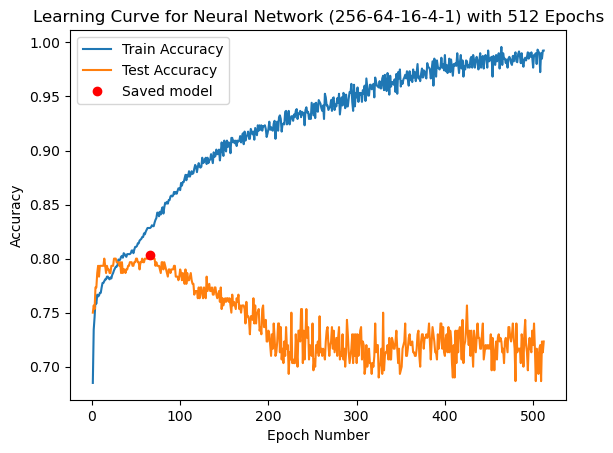

In [489]:
learning_curve(history_256_64_16_4_1, 66, "Neural Network (256-64-16-4-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [490]:
create_metrics(r"nn_ckpts\model_256_64_16_4_1\epoch_66-0.80.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Creating neural network model with 5 layers with neurons 1024, 512, 64, 8, 1

In [491]:
history_1024_512_64_8_1 = create_model([1024, 512, 64, 8, 1], 5, X_train_norm, Y_train, X_test_norm, Y_test)

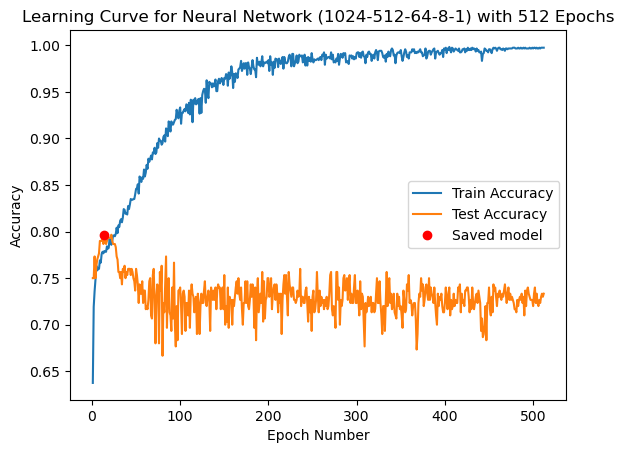

In [492]:
learning_curve(history_1024_512_64_8_1, 14, "Neural Network (1024-512-64-8-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [493]:
create_metrics(r"nn_ckpts\model_1024_512_64_8_1\epoch_14-0.80.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


Creating neural network model with 5 layers with neurons 16, 8, 4, 2, 1

In [495]:
history_16_8_4_2_1 = create_model([16, 8, 4, 2, 1], 5, X_train_norm, Y_train, X_test_norm, Y_test)

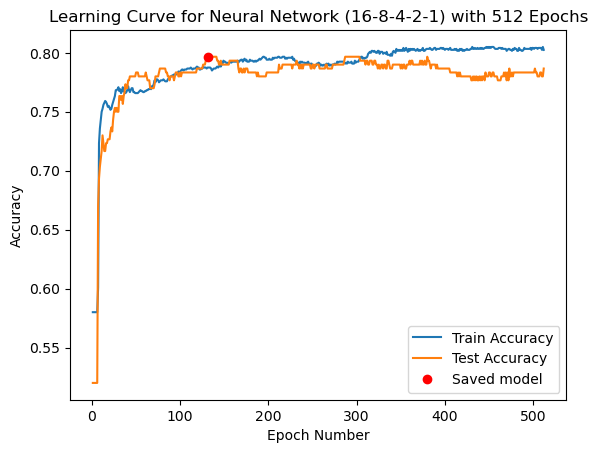

In [496]:
learning_curve(history_16_8_4_2_1, 132, "Neural Network (16-8-4-2-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [497]:
create_metrics(r"nn_ckpts\model_16_8_4_2_1\epoch_132-0.80.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


Creating neural network model with 5 layers with neurons 32, 16, 8, 4, 1

In [499]:
history_32_16_8_4_1 = create_model([32, 16, 8, 4, 1], 5, X_train_norm, Y_train, X_test_norm, Y_test)

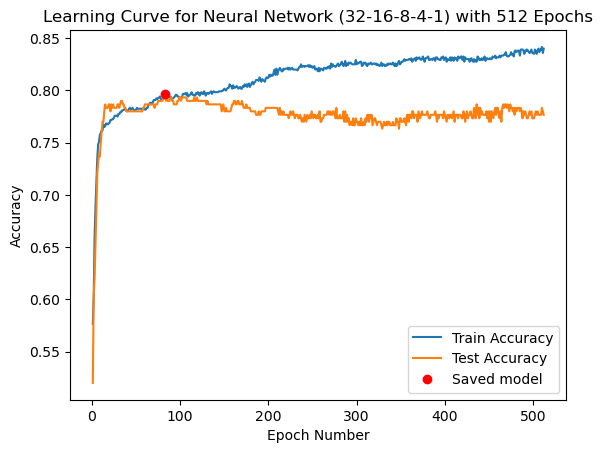

In [555]:
learning_curve(history_32_16_8_4_1, 83, "Neural Network (32-16-8-4-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [556]:
create_metrics(r"nn_ckpts\model_32_16_8_4_1\epoch_83-0.80.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Creating neural network model with 5 layers with neurons 64, 32, 16, 8, 1

In [502]:
history_64_32_16_8_1 = create_model([64, 32, 16, 8, 1], 5, X_train_norm, Y_train, X_test_norm, Y_test)

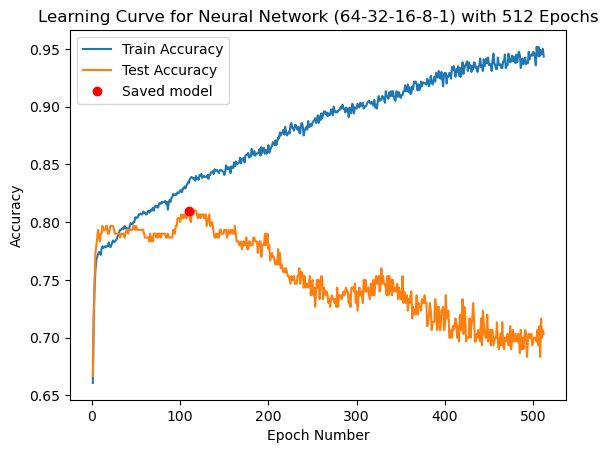

In [503]:
learning_curve(history_64_32_16_8_1, 110, "Neural Network (64-32-16-8-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [504]:
create_metrics(r"nn_ckpts\model_64_32_16_8_1\epoch_110-0.81.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


Creating neural network model with 5 layers with neurons 128, 64, 32, 16, 1

In [505]:
history_128_64_32_16_1 = create_model([128, 64, 32, 16, 1], 5, X_train_norm, Y_train, X_test_norm, Y_test)

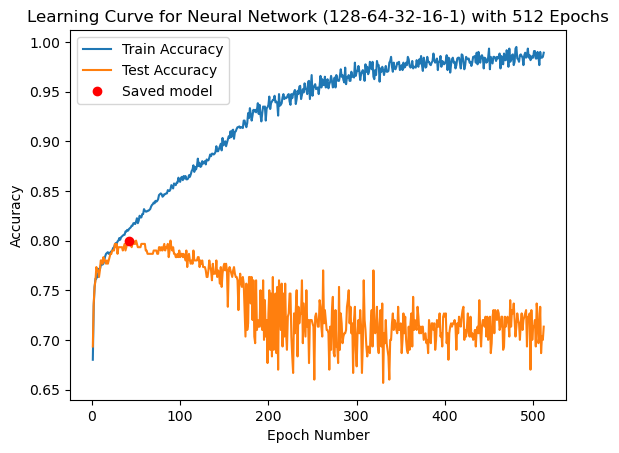

In [507]:
learning_curve(history_128_64_32_16_1, 42, "Neural Network (128-64-32-16-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [508]:
create_metrics(r"nn_ckpts\model_128_64_32_16_1\epoch_42-0.80.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


Creating neural network model with 5 layers with neurons 256, 128, 64, 32, 1

In [509]:
history_256_128_64_32_1 = create_model([256, 128, 64, 32, 1], 5, X_train_norm, Y_train, X_test_norm, Y_test)

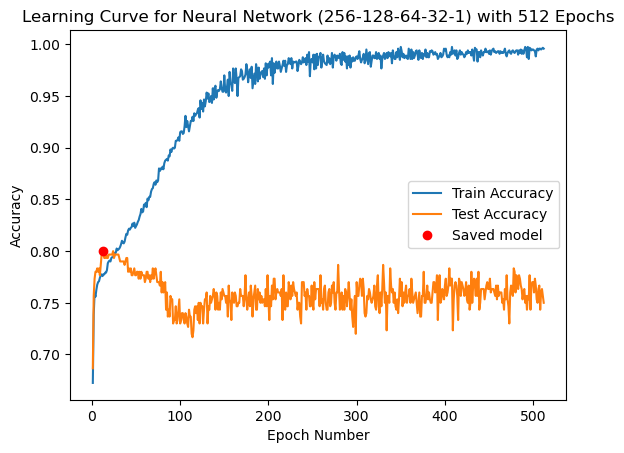

In [510]:
learning_curve(history_256_128_64_32_1, 12, "Neural Network (256-128-64-32-1)", [models, num_epochs, train_accs, train_losses, test_accs, test_losses])

In [511]:
create_metrics(r"nn_ckpts\model_256_128_64_32_1\epoch_12-0.80.keras", X_test_norm, [precisions, recalls, f1_scores, total_parameters])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [559]:
pd.DataFrame(
    {
        'Model': models,
        'Number of Epochs': num_epochs,
        'Train Accuracy': train_accs,
        'Train Loss': train_losses,
        'Test Accuracy': test_accs,
        'Test Loss': test_losses,
        'Precision': precisions,
        'Recall': recalls,
        'F1 Score': f1_scores,
        'Total Parameters': total_parameters
    }
)

,Model,Number of Epochs,Train Accuracy,Train Loss,Test Accuracy,Test Loss,Precision,Recall,F1 Score,Total Parameters
0,random baseline classifier,--,0.500000,17.845270,0.500000,16.693915,0.50,0.44,0.47,--
1,Logistic Regression Model,512,0.765833,0.497768,0.780000,0.494166,0.81,0.71,0.76,8
2,Neural Network (4-1),512,0.779167,0.477286,0.793333,0.481558,0.82,0.74,0.78,37
3,Neural Network (16-1),512,0.779167,0.467139,0.790000,0.476660,0.80,0.76,0.78,145
4,Neural Network (64-1),512,0.784167,0.464641,0.786667,0.477044,0.82,0.74,0.78,577
5,Neural Network (256-1),512,0.786667,0.447799,0.800000,0.476504,0.81,0.76,0.78,2305
6,Neural Network (1024-1),512,0.818333,0.394840,0.803333,0.494854,0.82,0.75,0.78,9217
7,Neural Network (16-4-1),512,0.775000,0.483025,0.800000,0.484524,0.82,0.75,0.78,201
8,Neural Network (64-8-1),512,0.780833,0.465341,0.800000,0.478991,0.81,0.76,0.78,1041
9,Neural Network (256-16-1),512,0.781667,0.459659,0.803333,0.478630,0.81,0.76,0.78,6177


Finding architecture to overfit when output is also a feature.

In [535]:
model = Sequential()
# model.add(keras.Input(shape=(len((X_norm.join(y)).columns), )))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(2, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, input_dim=len((X_norm.join(y)).columns), activation='sigmoid'))

C:\Users\megan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [536]:
model.summary()

Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_183 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [537]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [538]:
model.fit(x=X_norm.join(y), y=y, epochs=128, verbose=1)

Epoch 1/128
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4813 - loss: 0.7784 
Epoch 2/128
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5095 - loss: 0.7264
Epoch 3/128
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5376 - loss: 0.6844
Epoch 4/128
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5795 - loss: 0.6482
Epoch 5/128
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6395 - loss: 0.6176
Epoch 6/128
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7040 - loss: 0.5919
Epoch 7/128
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7591 - loss: 0.5702
Epoch 8/128
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.5515
Epoch 9/128
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8327 - loss: 0.5349
Epoch 10/128
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8748 - loss: 0.5197
Epoch 11/128
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9004 - loss: 0.5055
Epoch 12/128
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

Making a function to represent the model and a function to serve as the prediction model.

In [13]:
# represent model
def model(file_path):
    return keras.models.load_model(file_path)

best_model = model(r"nn_ckpts\model_512_64_8_1\epoch_66-0.82.keras")

In [14]:
# prediction model
def predictions(model, X_test):
    num_layers = 4
    curr_input = X_test
    for i in range(num_layers):
        weights, bias = model.layers[i].get_weights()
        if i == (num_layers - 1):
            output = 1 / (1 + np.exp(-((curr_input @ weights) + bias)))
            curr_input = output
        else:
            output = np.maximum(0, (curr_input @ weights) + bias)
            curr_input = output

    curr_input[curr_input >= 0.5] = 1
    curr_input[curr_input < 0.5] = 0

    return curr_input

In [15]:
pred = predictions(best_model, X_test_norm)
trained_pred = best_model.predict(X_test_norm).flatten()
trained_pred[trained_pred >= 0.5] = 1
trained_pred[trained_pred < 0.5] = 0

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


In [19]:
(pred[0] == trained_pred).unique()

array([ True])

# Phase 4: Feature importance and reduction

Plotting validation accuracies for seven models with one feature from the dataset.

In [608]:
def plot_accuracies(neurons, layers, X_train, X_test, Y_train, Y_test):
    val_accuracies = []
    for i in range(len(X_train.columns)):
        curr_train = X_train.iloc[:, [i]]
        curr_test = X_test.iloc[:, [i]]
        
        model = Sequential()
        checkpoint_filepath = r"phase_4\\step_1"
        model.add(keras.Input(shape=(len(curr_train.columns), )))
        for i in range(layers):
            if neurons[i] == 1:
                model.add(Dense(1, activation='sigmoid'))
            else:
                model.add(Dense(neurons[i], activation='relu'))
    
        checkpoint_filepath += "\\epoch_{epoch:02d}-{val_accuracy:.2f}.keras"
            
        callback_a = keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)
        
        model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
        history = model.fit(x=curr_train, y=Y_train, validation_data=(curr_test, Y_test), epochs=512, verbose=0, callbacks=[callback_a])
        
        val_acc = history.history['val_accuracy']
        max_val = max(val_acc)
        val_accuracies.append(max_val)

    min_val = min(val_accuracies)
    min_val = math.floor(min_val * 10) / 10
    plt.figure(figsize=(12, 8))
    plt.ylim((min_val, 1))
    plt.bar(X_train.columns, val_accuracies)
    plt.xticks(rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Validation Accuracy")
    plt.title("Validation Accuracy of Every Column in Dataset")
    plt.savefig('Valdation Accuracies for Models With One Feature')
    plt.show()
    return val_accuracies

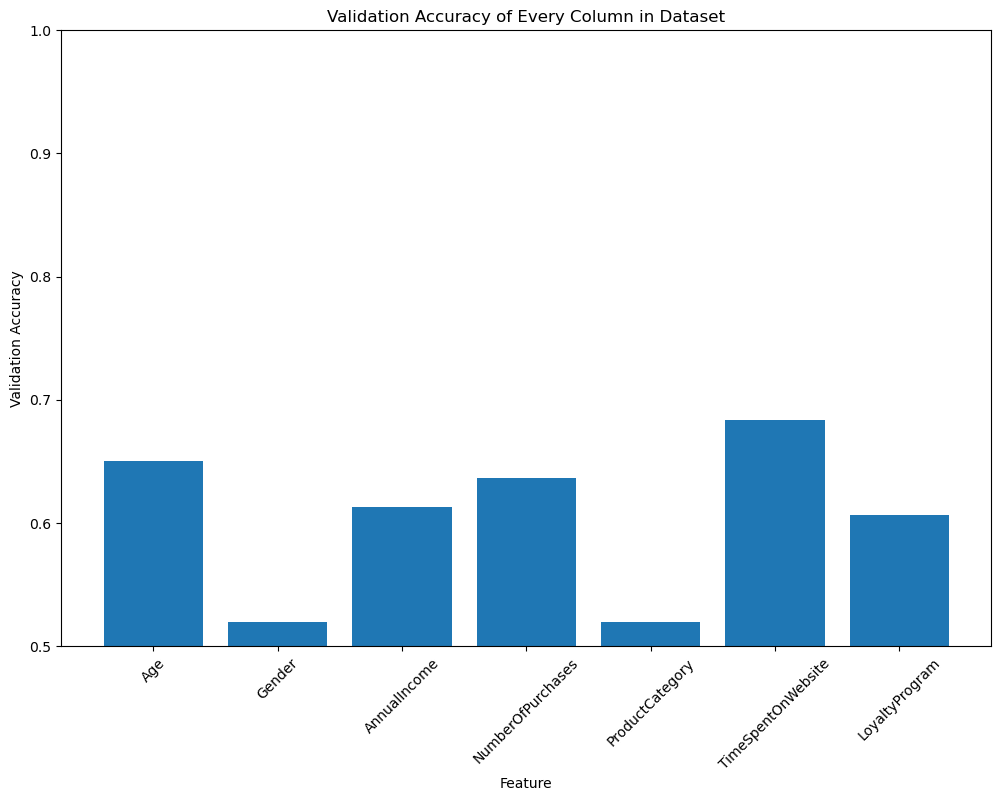

In [609]:
val_accs_each_feature = plot_accuracies([512, 64, 8, 1], 4, X_train_norm, X_test_norm, Y_train, Y_test)

Creating models by removing the least important feature each time.

In [624]:
def feature_reduced_model(val_accs, X_train, X_test, Y_train, Y_test):
    test_accs = val_accs.copy()
    accs = []
    x_axis = []
    without = "Without "
    while len(test_accs) > 1:
        min_index = test_accs.index(min(test_accs))
        remove_col = X_train.columns[min_index]
        if len(test_accs) == 7:
            without += remove_col
        elif len(test_accs) == 2:
            without += f', and {remove_col}'
        else:
            without += f', {remove_col}'

        x_axis.append(without)
        
        X_train = X_train.loc[:, X_train.columns != remove_col]
        X_test = X_test.loc[:, X_test.columns != remove_col]
        
        model = Sequential()
        checkpoint_filepath = f"phase_4\\{without}"
        model.add(keras.Input(shape=(len(X_train.columns), )))
        neurons = [512, 64, 8, 1]
        for i in range(4):
            if neurons[i] == 1:
                model.add(Dense(1, activation='sigmoid'))
            else:
                model.add(Dense(neurons[i], activation='relu'))
    
        checkpoint_filepath += "\\epoch_{epoch:02d}-{val_accuracy:.2f}.keras"
            
        callback_a = keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)
        
        model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
        history = model.fit(x=X_train, y=Y_train, validation_data=(X_test, Y_test), epochs=512, verbose=0, callbacks=[callback_a])
        

        val_acc = history.history['val_accuracy']
        accs.append(max(val_acc))

        del test_accs[min_index]

    min_val = min(accs)
    min_val = math.floor(min_val * 10) / 10
    plt.figure(figsize=(12, 8))
    plt.ylim((min_val, 1))
    colors = plt.cm.plasma(np.linspace(0, 1, len(x_axis)))
    bars = plt.bar(x_axis, accs, color=colors)
    for i, bar in enumerate(bars):
        bar.set_label(x_axis[i])
    
    plt.xticks([]) 
    plt.xlabel("Model")
    plt.ylabel("Validation Accuracy")
    plt.title("Validation Accuracy for Models Removing the Least Important Feature Each Time")
    plt.legend()
    plt.savefig('Valdation Accuracies Removing One Feature.png')
    plt.show()
    return accs

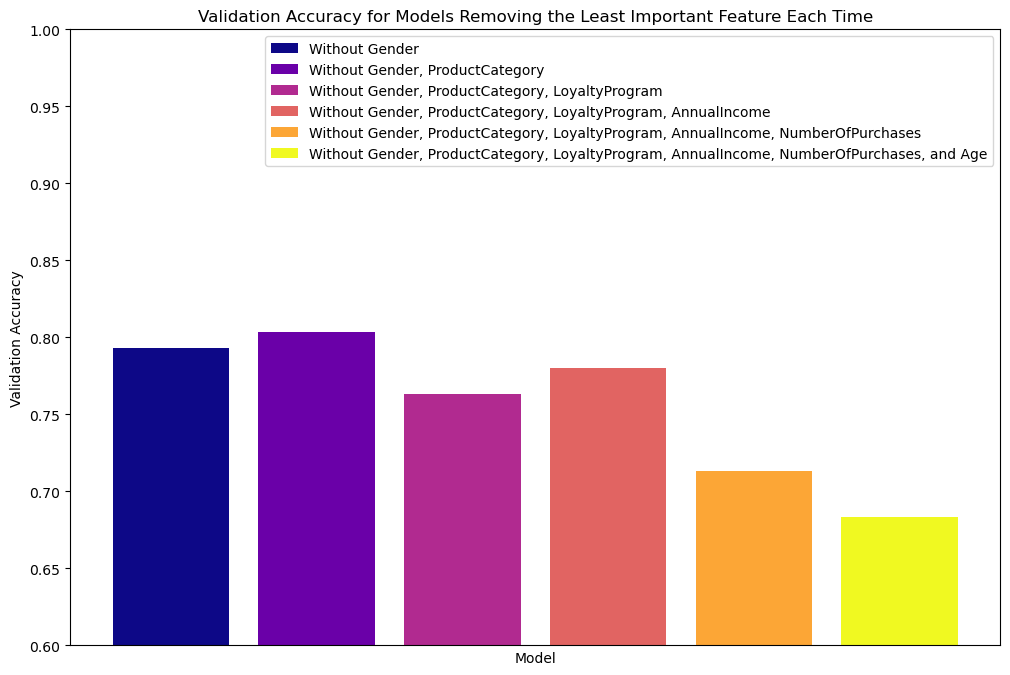

In [625]:
val_accs_remove_feature = feature_reduced_model(val_accs_each_feature, X_train_norm, X_test_norm, Y_train, Y_test)

In [631]:
print(f'The validation accuracy of the best feature-reduced model is {round(val_accs_remove_feature[1], 3)} while the validation accuracy of the best full-feature model is {round(test_accs[12], 3)}')

The validation accuracy of the best feature-reduced model is 0.803 while the validation accuracy of the best full-feature model is 0.817


Calculating the shapely value and finding which feature(s) have the biggest impact.

In [28]:
def shapley_value(best_model, X_train):
    instance = X_train.iloc[[1], :]
    train_pred = best_model.predict(X_train).flatten()
    base_pred = np.mean(train_pred)


    cols = range(len(X_train.columns))
    subsets = [[]]
    for col in cols:
        subsets += [sub + [col] for sub in subsets]

    predictions = {}
    for sub in subsets:
        mod_instance = instance.copy()
        for i in cols:
            if i not in sub:
                mod_instance.iloc[0, i] = 0

        pred = best_model.predict(mod_instance).flatten()
        predictions[tuple(sub)] = pred

    avg_marg_contr = {}
    for col in cols:
        total_contr = 0
        num = 0
        for sub in subsets:
            if col not in sub:
                pred_wo_feature = predictions[tuple(sub)]
                sub_w_feature = sub + [col]
                pred_w_feature = predictions[tuple(sorted(sub_w_feature))]
                marg_contr = pred_w_feature - pred_wo_feature
                total_contr += marg_contr
                num += 1

        avg_contr = total_contr / num
        avg_marg_contr[col] = avg_contr

    final_pred = base_pred
    for col in cols:
        final_pred += avg_marg_contr[col]

    return final_pred, avg_marg_contr

In [29]:
shap_val, marg_contr = shapley_value(best_model, X_train_norm)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━

In [30]:
shap_val

array([0.7915037], dtype=float32)

In [31]:
marg_contr

{0: array([-0.20027731], dtype=float32),
 1: array([0.], dtype=float32),
 2: array([0.24360488], dtype=float32),
 3: array([0.08120111], dtype=float32),
 4: array([0.01818189], dtype=float32),
 5: array([0.21860923], dtype=float32),
 6: array([0.], dtype=float32)}

# Phase 5: ROC and AUC

In [40]:
def roc_curve(best_model, X_test, Y_test):
    scores = best_model.predict(X_test).flatten()
    thresholds = np.sort(np.unique(scores))[::-1]
    tpr = [0]
    fpr = [0]
    for t in thresholds:
        pred = (scores >= t).astype(int)
        tp = np.sum(np.logical_and(pred == 1, Y_test['PurchaseStatus'] == 1))
        tn = np.sum(np.logical_and(pred == 0, Y_test['PurchaseStatus'] == 0))
        fp = np.sum(np.logical_and(pred == 1, Y_test['PurchaseStatus'] == 0))
        fn = np.sum(np.logical_and(pred == 0, Y_test['PurchaseStatus'] == 1))

        if (tp + fn) > 0:
            tpr.append(tp / (tp + fn))
        else:
            tpr.append(0)

        if (fp + tn) > 0:
            fpr.append(fp / (fp + tn))
        else:
            fpr.append(0)

    tpr.append(1)
    fpr.append(1)

    plt.figure(figsize=(12,8))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.savefig('ROC curve.png')
    plt.show()
    return tpr, fpr

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


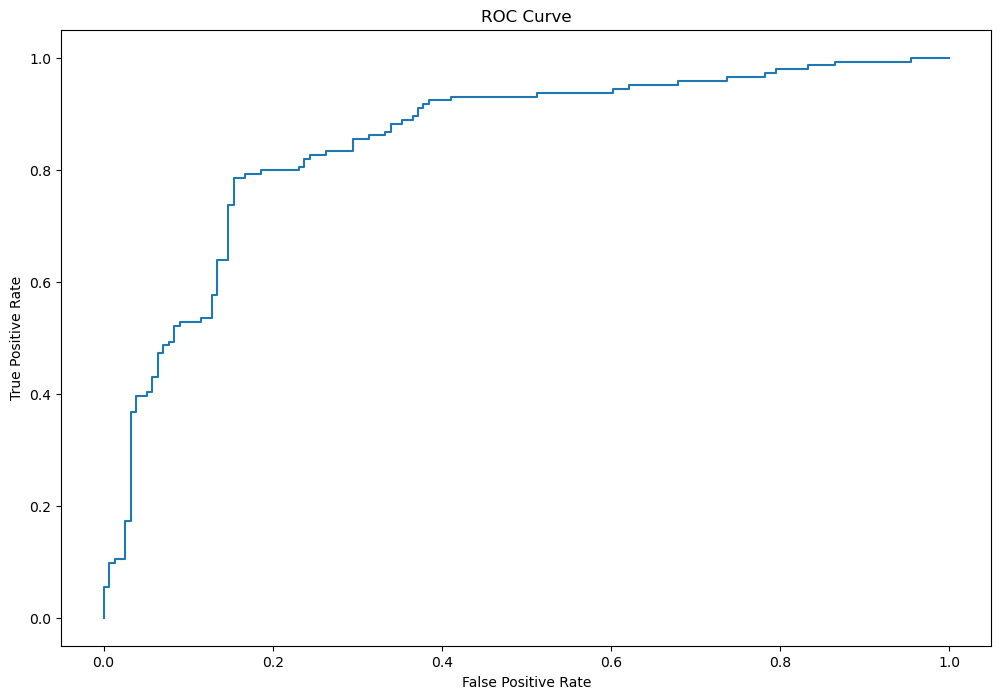

In [41]:
tpr, fpr = roc_curve(best_model, X_test_norm, Y_test)

In [42]:
auc = np.trapz(tpr, fpr)
print(auc)

0.8493144586894588
